### Importing libraries and modules

In [55]:
import numpy as np
np.random.seed(123) 
# this will make the randpm funciton predictable 
# i.e. the random value will be provided as same every time

In [56]:
from tensorflow.keras.models import Sequential
# originally : from keras.models import Sequential
# you have to do tensorflow.keras.models due to some error with get_default_graph
# Sequential is a linear stack og neiral network layers

In [57]:
# debugging error foe model = Sequential()
# not necessary
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [58]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# instead of from keras.layers import Dense, Dropout, Activation, Flatten because tensorflow 2.0 bug
# core layers of keras

In [59]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
# from keras.layers import Convolution2D, MaxPooling2D
# these two convolutional layers help us train on image data

In [60]:
from keras.utils import np_utils
# for tranforming the data

### Loading image data

In [61]:
from keras.datasets import mnist 
# testing with mnist but later going to use fashion mnist

In [62]:
# Load pre- shuffled MNIST data into train and test sets
(X_train, y_train),(X_test,y_test) =  mnist.load_data()

In [63]:
print(X_train.shape)

(60000, 28, 28)


In [64]:
# testing shape method on a normal np array 
# not important
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,21,13])
print(arr.shape)

(13,)


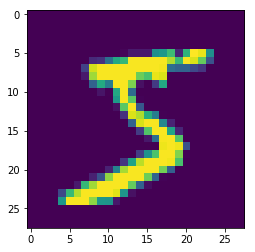

In [65]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
# for plotting the value

### reshaping train and test data for all column 

In [66]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# we need reshape X_train from having shape (n, width, height) to (n, depth = 1, width, height)
# its necessary in some image processing backends as theano not sure about tensorflow
# theano require 1+ 3 shape. 1 as n and other 3 channel

In [67]:
print(X_train.shape)
# checking the new shape
# notice that the depth is just 1 as its a 2d image

(60000, 1, 28, 28)


In [68]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train[5])

[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.  13.  25. 100. 122.   7.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  33.
   151. 208. 252. 252. 252. 146.   0.   0.   

In [69]:
# now we can convert these value upto 255 between 0 and 1 by deviding by 255
X_train /= 255
X_test /= 255

print(X_train[5][0][14][14])
# here we are just looking at a specific coordinate in the tensor 

0.99215686


### Pre processing class labels

In [70]:
print(y_train.shape)

(60000,)


In [71]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [72]:
# we require 1- different labels for each of these labels 
# and it might be problematic if our array is linear
# lets convert 1- Dimensional class arrays to 10- Dimensional array
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [73]:
print(Y_train.shape)


(60000, 10)


In [74]:
print(Y_train[5])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Defining model architecture

In [75]:
# reference for model architecture 
# https://github.com/keras-team/keras/tree/master/examples

model = Sequential()
# sequential helps you to build models layer by layer

In [78]:
model.add(Conv2D(32, (3, 3), activation="relu"))

# Convolution2D is the input layer
# input shape should be equal to shape of one of the n (here 6000) samples
# i.e. input_shape = (1,28,28)
# activation function is generally used to bring the entire range of real number between 0 and 1 like sigmoid activation
# or 1 and -1 as is the case with tanh activation function 
# A good activation function should be differentiable and monotonic (function is always increasing or decreasing)
# relu's derivative and relu itself is monotonic and differentiable
# relu - half rectified function i.e. function is zero when value is less than 0 else linear range till infinity if value is more than 0

# softmax function is generally used for multiclass classification
# leaky relu: since relu is zero for all negative values we can use leaky relu with a linear function in negative y axis


# from tensorflow 2.0 we use Conv2D

TypeError: ('Keyword argument not understood:', 'border_mode')